# COGS 118A Group 035 Wi23 - Random Forest with sk-learn
### Group Memebers:
<ul >
  <li style="padding-left: 20px;"> Jamie Wei (A15921963) </li>
  <li style="padding-left: 20px;"> Nicole Rangan (A15011222) </li>
  <li style="padding-left: 20px;"> Sarita Raghunath (A16425750) </li>
  <li style="padding-left: 20px;"> Zehong Li (A15852954) </li>
</ul>


In [27]:
# necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import KFold
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, auc, RocCurveDisplay
from sklearn.metrics import PrecisionRecallDisplay
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, roc_auc_score, precision_recall_curve

In [4]:
# compatibility check
import sys
print(sys.version)
import pip
print(pip.__version__)

3.9.13 (tags/v3.9.13:6de2ca5, May 17 2022, 16:36:42) [MSC v.1929 64 bit (AMD64)]
22.2


In [5]:
# assert library import
assert pd.__version__ >= '1.0.0'
assert np.__version__ >= '1.0.0'
assert RandomForestClassifier
assert plt
assert train_test_split
assert sns
assert accuracy_score
assert RandomizedSearchCV

In [6]:
# read csv
df = pd.read_csv('cleaned_data_final.csv')

# turn labels to 0 and 1s
df['radiant_win'] = df['radiant_win'].replace({True: 1, False: 0})

# a peek at our dataset
df

,match_id,radiant_win,duration,avg_mmr,team1_hero1,team1_hero2,team1_hero3,team1_hero4,team1_hero5,team1_hero6,...,team2_hero119,team2_hero120,team2_hero121,team2_hero123,team2_hero126,team2_hero128,team2_hero129,team2_hero135,team2_hero136,team2_hero137
0,7045889918,0,2199,2607.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,7045889915,1,2301,2931.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,7045889913,1,2093,1942.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,7045889912,0,2856,4332.0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,7045889911,0,3539,3942.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91583,6744845900,0,3297,2763.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
91584,6744846112,1,1915,2882.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
91585,6744847011,0,2101,2159.0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
91586,6744847112,1,2494,2107.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
# train-test split
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:, 4:], df[['radiant_win']], test_size=0.2, random_state=42)

In [8]:
# hyperparameter tuning dictionary that will be searched on
params = {
    'n_estimators': [100, 500, 1000],
    'criterion': ["gini", "entropy"],
    'max_depth': [3, 5, 7],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
    'class_weight': ['balanced', 'balanced_subsample'],
    "bootstrap": [True, False]
}

In [9]:
# create model object
rf = RandomForestClassifier(random_state=42)

In [10]:
search = RandomizedSearchCV(rf, param_distributions=params, n_iter=100, cv=2, verbose=3)
search_result = search.fit(X_train, y_train.values.ravel())

Fitting 2 folds for each of 100 candidates, totalling 200 fits
[CV 1/2] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=5, min_samples_leaf=2, min_samples_split=5, n_estimators=1000;, score=0.548 total time=  19.7s
[CV 2/2] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=5, min_samples_leaf=2, min_samples_split=5, n_estimators=1000;, score=0.548 total time=  19.4s
[CV 1/2] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=5, min_samples_leaf=4, min_samples_split=10, n_estimators=1000;, score=0.548 total time=  19.4s
[CV 2/2] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=5, min_samples_leaf=4, min_samples_split=10, n_estimators=1000;, score=0.548 total time=  19.4s
[CV 1/2] END bootstrap=False, class_weight=balanced, criterion=entropy, max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.542 total time=   1.8s
[CV 2/2] END bo

In [13]:
search_result.best_params_

{'n_estimators': 1000,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_depth': 7,
 'criterion': 'gini',
 'class_weight': 'balanced',
 'bootstrap': True}

In [20]:
rf_best = RandomForestClassifier(**search_result.best_params_, random_state = 42, verbose = 3)
history = rf_best.fit(X_train, y_train.values.ravel())

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 1000
building tree 2 of 1000
building tree 3 of 1000
building tree 4 of 1000
building tree 5 of 1000
building tree 6 of 1000
building tree 7 of 1000
building tree 8 of 1000
building tree 9 of 1000
building tree 10 of 1000
building tree 11 of 1000
building tree 12 of 1000
building tree 13 of 1000
building tree 14 of 1000
building tree 15 of 1000
building tree 16 of 1000
building tree 17 of 1000
building tree 18 of 1000
building tree 19 of 1000
building tree 20 of 1000
building tree 21 of 1000
building tree 22 of 1000
building tree 23 of 1000
building tree 24 of 1000
building tree 25 of 1000
building tree 26 of 1000
building tree 27 of 1000
building tree 28 of 1000
building tree 29 of 1000
building tree 30 of 1000
building tree 31 of 1000
building tree 32 of 1000
building tree 33 of 1000
building tree 34 of 1000
building tree 35 of 1000
building tree 36 of 1000
building tree 37 of 1000
building tree 38 of 1000
building tree 39 of 1000
building tree 40 of 1000
building 

[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:   35.7s finished


In [32]:
# define a show metric function
def show_metrics(y_tr, y_te, yhat_tr, yhat_te, named):
    # accuracy scores for training and test sets
    acc_train = accuracy_score(y_tr, yhat_tr)
    acc_test = accuracy_score(y_te, yhat_te)

    print(f'training set accuracy (n={y_tr.shape[0]}): {acc_train:4.3f}')
    print(f'test set accuracy (n={y_te.shape[0]}): {acc_test:4.3f}')
    print()
    print('classificiation report on test set performance')
    print(classification_report(y_te, yhat_te, digits = 5))
    print()

    with sns.axes_style('white'):
        # confusion matrix
        ConfusionMatrixDisplay.from_predictions(y_te, yhat_te)
        plt.show()
        
        # roc-auc
        fpr, tpr, thresholds = roc_curve(y_te, yhat_te) 
        roc_auc = auc(fpr, tpr)
        roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,
                                   estimator_name=named)
        roc_display.plot()
        plt.title('ROC Curve')
        plt.show()
        
        # precision-recall auc
        precision, recall, thresholds = precision_recall_curve(y_te, yhat_te)
        pr_auc = auc(recall, precision)
        pr_display = PrecisionRecallDisplay(precision=precision, recall=recall,
                                             average_precision=pr_auc,
                                             estimator_name=named)
        pr_display.plot()
        plt.title('Precision-Recall Curve')
        plt.show()
        
        # balanced accuracy
        tn, fp, fn, tp = confusion_matrix(y_te, yhat_te).ravel()
        balanced_accuracy = (tp/(tp+fn) + tn/(tn+fp))/2
        print(f'Balanced accuracy: {balanced_accuracy:.3f}')
        
        # specificity and negative predictive value
        specificity = tn / (tn + fp)
        npv = tn / (tn + fn)
        print(f'Specificity: {specificity:.3f}')
        print(f'Negative predictive value: {npv:.3f}')
        
        # false positive and false negative rates
        fpr = fp / (fp + tn)
        fnr = fn / (fn + tp)
        print(f'False positive rate: {fpr:.3f}')
        print(f'False negative rate: {fnr:.3f}')

In [33]:
# get both predicted train and test labels
yhat_te_prob = rf_best.predict(X_test)
yhat_te = (yhat_te_prob > 0.5).astype(int)
yhat_te

yhat_tr_prob = rf_best.predict(X_train)
yhat_tr = (yhat_tr_prob > 0.5).astype(int)
yhat_tr

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    3.8s finished


array([0, 1, 1, ..., 0, 0, 1])

training set accuracy (n=73270): 0.588
test set accuracy (n=18318): 0.548

classificiation report on test set performance
              precision    recall  f1-score   support

           0    0.54323   0.54293   0.54308      9062
           1    0.55275   0.55305   0.55290      9256

    accuracy                        0.54804     18318
   macro avg    0.54799   0.54799   0.54799     18318
weighted avg    0.54804   0.54804   0.54804     18318




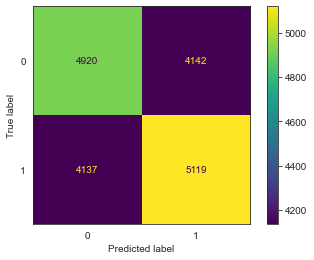

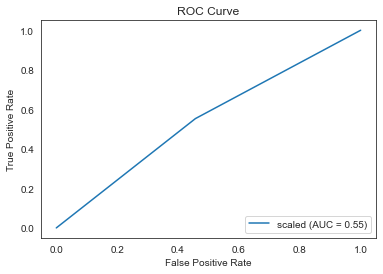

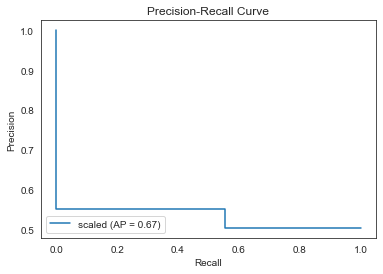

Balanced accuracy: 0.548
Specificity: 0.543
Negative predictive value: 0.543
False positive rate: 0.457
False negative rate: 0.447


In [34]:
#show our metrics
show_metrics(y_train, y_test, yhat_tr, yhat_te, 'scaled')